In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering

import warnings
warnings.filterwarnings("ignore") 

In [18]:
df = pd.read_csv("casestudy.csv")

In [19]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male


In [20]:
df['Gender'] = df['Gender'].replace({'Female': 1, 'Male': 0})

In [21]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,1
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,0


## Getting Dummies

In [22]:
df_dummies = pd.get_dummies(df)

In [23]:
df_dummies.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1,1,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,1,1,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,1,1,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,1,0,0,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,0,0,0,0,1,0,0


## Scaling DataFrame

In [24]:
scalar=StandardScaler()

In [31]:
scaled_df = scalar.fit_transform(df_dummies)

In [47]:
pca = PCA(n_components=4)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4"])
pca_df

,PCA1,PCA2,PCA3,PCA4
0,1.345432,-1.100831,0.553397,1.861538
1,-0.648518,0.361445,-0.719261,1.933283
2,0.181387,0.406178,1.589143,2.398071
3,-0.730449,-0.661893,-1.286325,0.308845
4,-0.244716,-0.905040,-0.023296,-1.105031
...,...,...,...,...
1448,3.961985,1.545424,0.566889,0.163031
1449,-1.943733,0.064946,0.518081,0.118175
1450,-1.290669,1.423436,0.544277,-0.948423
1451,-2.404815,-1.181350,2.154833,1.359355


## K-means clustering

In [35]:

# Initialize an empty list to store inertia values (sum of squared distances to the closest centroid)
inertia_values = []


cluster_range = range(2, 9)


for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)  
  

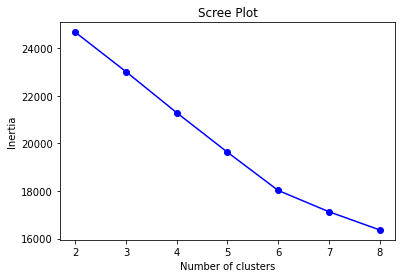

In [37]:
# Plotting the scree plot

plt.plot(cluster_range, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot')
plt.show()

In [49]:
kmeans_model = KMeans(n_clusters=6, random_state=42)

cluster_labels = kmeans_model.fit_predict(scaled_df)


original_df_with_clusters = pd.concat([df_dummies, pd.DataFrame({'cluster': cluster_labels})], axis=1)


In [50]:
original_df_with_clusters.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Like,Age,Gender,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,cluster
0,0,1,0,1,0,1,1,0,1,0,...,-3,61,1,1,0,0,0,0,0,3
1,1,1,0,1,1,1,1,1,1,0,...,2,51,1,1,0,0,0,0,0,3
2,0,1,1,1,1,1,0,1,1,1,...,1,62,1,1,0,0,0,0,0,3
3,1,1,0,1,1,1,1,1,0,0,...,4,69,1,0,0,0,0,1,0,1
4,0,1,0,1,1,1,1,0,0,1,...,2,49,0,0,0,0,1,0,0,2


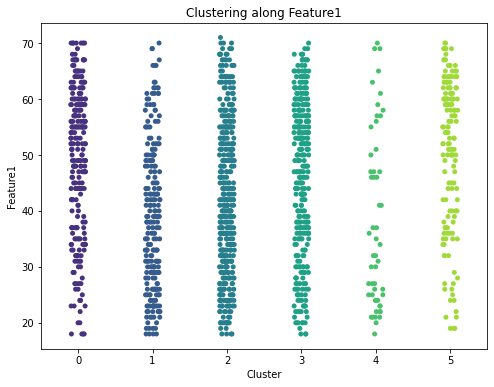

In [55]:
plt.figure(figsize=(8, 6))
sns.stripplot(x="cluster", y="Age", data=original_df_with_clusters, palette='viridis', jitter=True)
plt.title("Clustering along Feature1")
plt.xlabel("Cluster")
plt.ylabel("Feature1")
plt.show()